# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    frequencies = {}
    for content in file_contents:
        if content.isalpha() == False and content in punctuations:
            file_contents = file_contents.replace(content, "")
    
    words = file_contents.lower().split()
    
    for word in list(words):
        if word in uninteresting_words:
            words.remove(word)
    
    for key in words:
        frequencies[key] = words.count(key)
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

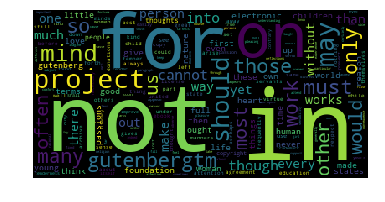

In [4]:
# Display your wordcloud image

myimage = calculate_frequencies(
'''The Project Gutenberg eBook of Thoughts on the Education of
Daughters, by Mary Wollstonecraft

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Thoughts on the Education of Daughters
       with Reflections on Female Conduct, in The more important Duties
       of Life

Author: Mary Wollstonecraft

Release Date: February 21, 2022 [eBook #67466]

Language: English

Produced by: Richard Tonsing and the Online Distributed Proofreading
             Team at https://www.pgdp.net (This file was produced from
             images generously made available by The Internet Archive)

*** START OF THE PROJECT GUTENBERG EBOOK THOUGHTS ON THE EDUCATION OF
DAUGHTERS ***





                                THOUGHTS

                                 ON THE

                               EDUCATION

                                   OF

                               DAUGHTERS:

                                  WITH

                     REFLECTIONS ON FEMALE CONDUCT,

                                   IN

                   The more important DUTIES of LIFE,


                        By MARY WOLLSTONECRAFT.


                                LONDON:
               PRINTED FOR J. JOHNSON, N^o 72, ST. PAUL’S
                              CHURCH-YARD.

                             M DCC LXXXVII.




                                PREFACE.


In the following pages I have endeavoured to point out some important
things with respect to female education. It is true, many treatises have
been already written; yet it occurred to me, that much still remained to
be said. I shall not swell these sheets by writing apologies for my
attempt. I am afraid, indeed, the reflections will, by some, be thought
too grave; but I could not make them less so without writing affectedly;
yet, though they may be insipid to the gay, others may not think them
so; and if they should prove useful to one fellow-creature, and beguile
any hours, which sorrow has made heavy, I shall think I have not been
employed in vain.




                                CONTENTS

 PREFACE
 The NURSERY
 MORAL DISCIPLINE
 EXTERIOR ACCOMPLISHMENTS
 ARTIFICIAL MANNERS
 DRESS
 The FINE ARTS
 READING
 BOARDING-SCHOOLS
 The TEMPER
 Unfortunate Situation of Females, fashionably educated, and left without
    a Fortune
 LOVE
 MATRIMONY
 DESULTORY THOUGHTS
 THE BENEFITS WHICH ARISE FROM DISAPPOINTMENTS
 ON THE TREATMENT OF SERVANTS
 THE OBSERVANCE OF SUNDAY
 ON THE MISFORTUNE OF FLUCTUATING PRINCIPLES
 BENEVOLENCE
 CARD-PLAYING
 THE THEATRE
 PUBLIC PLACES




                                THOUGHTS
                                 ON THE

                               EDUCATION

                                   OF

                               DAUGHTERS.




                              THE NURSERY.


As I conceive it to be the duty of every rational creature to attend to
its offspring, I am sorry to observe, that reason and duty together have
not so powerful an influence over human conduct, as instinct has in the
brute creation. Indolence, and a thoughtless disregard of every thing,
except the present indulgence, make many mothers, who may have momentary
starts of tenderness, neglect their children. They follow a pleasing
impulse, and never reflect that reason should cultivate and govern those
instincts which are implanted in us to render the path of duty
pleasant—for if they are not governed they will run wild; and strengthen
the passions which are ever endeavouring to obtain dominion—I mean
vanity and self-love.

The first thing to be attended to, is laying the foundation of a good
constitution. The mother (if there are not very weighty reasons to
prevent her) ought to suckle her children. Her milk is their proper
nutriment, and for some time is quite sufficient. Were a regular mode of
suckling adopted, it would be far from being a laborious task. Children,
who are left to the care of ignorant nurses, have their stomachs
overloaded with improper food, which turns acid, and renders them very
uncomfortable. We should be particularly careful to guard them in their
infant state from bodily pain; as their minds can then afford them no
amusement to alleviate it. The first years of a child’s life are
frequently made miserable through negligence or ignorance. Their
complaints are mostly in their stomach or bowels; and these complaints
generally arise from the quality and quantity of their food.

The suckling of a child also excites the warmest glow of tenderness—Its
dependant, helpless state produces an affection, which may properly be
termed maternal. I have even felt it, when I have seen a mother perform
that office; and am of opinion, that maternal tenderness arises quite as
much from habit as instinct. It is possible, I am convinced, to acquire
the affection of a parent for an adopted child; it is necessary,
therefore, for a mother to perform the office of one, in order to
produce in herself a rational affection for her offspring.

Children very early contract the manners of those about them. It is easy
to distinguish the child of a well-bred person, if it is not left
entirely to the nurse’s care. These women are of course ignorant, and to
keep a child quiet for the moment, they humour all its little caprices.
Very soon does it begin to be perverse, and eager to be gratified in
every thing. The usual mode of acting is complying with the humours
sometimes, and contradicting them at others—just according to the
dictates of an uncorrected temper. This the infant finds out earlier
than can be imagined, and it gives rise to an affection devoid of
respect. Uniformity of conduct is the only feasible method of creating
both. An inflexible adherence to any rule that has been laid down makes
children comfortable, and saves the mother and nurse much trouble, as
they will not often contest, if they have not once conquered. They will,
I am sure, love and respect a person who treats them properly, if some
one else does not indiscreetly indulge them. I once heard a judicious
father say, “He would treat his child as he would his horse: first
convince it he was its master, and then its friend.” But yet a rigid
style of behaviour is by no means to be adopted; on the contrary, I wish
to remark, that it is only in the years of childhood that the happiness
of a human being depends entirely on others—and to embitter those years
by needless restraint is cruel. To conciliate affection, affection must
be shown, and little proofs of it ought always to be given—let them not
appear weaknesses, and they will sink deep into the young mind, and call
forth its most amiable propensities. The turbulent passions may be kept
down till reason begins to dawn.

In the nursery too, they are taught to speak; and there they not only
hear nonsense, but that nonsense retailed out in such silly, affected
tones as must disgust;—yet these are the tones which the child first
imitates, and its innocent playful manner renders them tolerable, if not
pleasing; but afterwards they are not easily got the better of—nay, many
women always retain the pretty prattle of the nursery, and do not forget
to lisp, when they have learnt to languish.

Children are taught revenge and lies in their very cradles. If they fall
down, or strike their heads against any thing, to quiet them they are
bid return the injury, and their little hands held out to do it. When
they cry, or are troublesome, the cat or dog is chastised, or some
bugbear called to take them away; which only terrifies them at first,
for they soon find out that the nurse means nothing by these dreadful
threatenings. Indeed, so well do they discover the fallacy, that I have
seen little creatures, who could scarcely speak, play over the same
tricks with their doll or the cat.

How, then, when the mind comes under discipline, can precepts of truth
be inforced, when the first examples they have had would lead them to
practice the contrary?




                           MORAL DISCIPLINE.


It has been asserted, “That no being, merely human, could properly
educate a child.” I entirely coincide with this author; but though
perfection cannot be attained, and unforeseen events will ever govern
human conduct, yet still it is our duty to lay down some rule to
regulate our actions by, and to adhere to it, as consistently as our
infirmities will permit. To be able to follow Mr. Locke’s system (and
this may be said of almost all treatises on education) the parents must
have subdued their own passions, which is not often the case in any
considerable degree.

The marriage state is too often a state of discord; it does not always
happen that both parents are rational, and the weakest have it in their
power to do most mischief.

How then are the tender minds of children to be cultivated?—Mamma is
only anxious that they should love her best, and perhaps takes pains to
sow those seeds, which have produced such luxuriant weeds in her own
mind. Or, what still more frequently occurs, the children are at first
made play-things of, and when their tempers have been spoiled by
indiscreet indulgence, they become troublesome, and are mostly left with
servants; the first notions they imbibe, therefore, are mean and vulgar.
They are taught cunning, the wisdom of that class of people, and a love
of truth, the foundation of virtue, is soon obliterated from their
minds. It is, in my opinion, a well-proved fact, that principles of
truth are innate. Without reasoning we assent to many truths; we feel
their force, and artful sophistry can only blunt those feelings which
nature has implanted in us as instinctive guards to virtue.
Dissimulation and cunning will soon drive all other good qualities
before them, and deprive the mind of that beautiful simplicity, which
can never be too much cherished.

Indeed it is of the utmost consequence to make a child artless, or to
speak with more propriety, not to teach them to be otherwise; and in
order to do so we must keep them out of the way of bad examples. Art is
almost always practiced by servants, and the same methods which children
observe them to use, to shield themselves from blame, they will
adopt—and cunning is so nearly allied to falsehood, that it will
infallibly lead to it—or some foolish prevaricating subterfuge will
occur; to silence any reproaches of the mind which may arise, if an
attention to truth has been inculcated.

Another cause or source of art is injudicious correction. Accidents or
giddy tricks are too frequently punished, and if children can conceal
these, they will, to avoid chastisement. Restrain them, therefore, but
never correct them without a very sufficient cause; such as a violation
of truth, cruelty to animals, inferiors, or those kind of follies which
lead to vice.

Children should be permitted to enter into conversation; but it requires
great discernment to find out such subjects as will gradually improve
them. Animals are the first objects which catch their attention; and I
think little stories about them would not only amuse but instruct at the
same time, and have the best effect in forming the temper and
cultivating the good dispositions of the heart. There are many little
books which have this tendency. One in particular I recollect: The
Perambulations of a Mouse. I cannot here help mentioning a book of
hymns, in measured prose, written by the ingenious author of many other
proper lessons for children. These hymns, I imagine, would contribute to
fill the heart with religious sentiments and affections; and, if I may
be allowed the expression, make the Deity obvious to the senses. The
understanding, however, should not be overloaded any more than the
stomach. Intellectual improvements, like the growth and formation of the
body, must be gradual—yet there is no reason why the mind should lie
fallow, while its “frail tenement” is imperceptibly fitting itself for a
more reasonable inhabitant. It will not lie fallow; promiscuous seeds
will be sown by accident, and they will shoot up with the wheat, and
perhaps never be eradicated.

Whenever a child asks a question, it should always have a reasonable
answer given it. Its little passions should be engaged. They are mostly
fond of stories, and proper ones would improve them even while they are
amused. Instead of these, their heads are filled with improbable tales,
and superstitious accounts of invisible beings, which breed strange
prejudices and vain fears in their minds.

The lisp of the nursery is confirmed, and vulgar phrases are acquired;
which children, if possible, should never hear. To be able to express
the thoughts with facility and propriety, is of great consequence in
life, and if children were never led astray in this particular, it would
prevent much trouble.

The riot too of the kitchen, or any other place where children are left
only with servants, makes the decent restraint of the parlour irksome. A
girl, who has vivacity, soon grows a romp; and if there are male
servants, they go out a walking with them, and will frequently take
little freedoms with Miss, the bearing with which gives a forwardness to
her air, and makes her pert. The becoming modesty, which being
accustomed to converse with superiors, will give a girl, is entirely
done away. I must own, I am quite charmed when I see a sweet young
creature, shrinking as it were from observation, and listening rather
than talking. It is possible a girl may have this manner without having
a very good understanding. If it should be so, this diffidence prevents
her from being troublesome.

It is the duty of a parent to preserve a child from receiving wrong
impressions.—As to prejudices, the first notions we have deserve that
name; for it is not till we begin to waver in our opinions, that we
exert our reason to examine them—and then, if they are received, they
may be called our own.

The first things, then, that children ought to be encouraged to observe,
are a strict adherence to truth; a proper submission to superiors; and
condescension to inferiors. These are the main articles; but there are
many others, which compared to them are trivial, and yet are of
importance. It is not pleasing to see a child full of bows and grimaces;
yet they need not be suffered to be rude. They should be employed, and
such fables and tales may be culled out for them as would excite their
curiosity. A taste for the beauties of nature should be very early
cultivated: many things, with respect to the vegetable and animal world,
may be explained in an amusing way; and this is an innocent source of
pleasure within every one’s reach.

Above all, try to teach them to combine their ideas. It is of more use
than can be conceived, for a child to learn to compare things that are
similar in some respects, and different in others. I wish them to be
taught to think—thinking, indeed, is a severe exercise, and exercise of
either mind or body will not at first be entered on, but with a view to
pleasure. Not that I would have them make long reflections; for when
they do not arise from experience, they are mostly absurd.




                       EXTERIOR ACCOMPLISHMENTS.


Under this head may be ranked all those accomplishments which merely
render the person attractive; and those half-learnt ones which do not
improve the mind. “A little learning of any kind is a dangerous thing;”
and so far from making a person pleasing, it has the contrary effect.

Parents have mostly some weighty business in hand, which they make a
pretext to themselves for neglecting the arduous task of educating their
children; they are therefore sent to school, and the allowance for them
is so low, that the person who undertakes the charge must have more than
she can possibly attend to; of course, the mechanical parts of education
can only be observed. I have known children who could repeat things in
the order they learnt them, that were quite at a loss when put out of
the beaten track. If the understanding is not exercised, the memory will
be employed to little purpose.

Girls learn something of music, drawing, and geography; but they do not
know enough to engage their attention, and render it an employment of
the mind. If they can play over a few tunes to their acquaintance, and
have a drawing or two (half done by the master) to hang up in their
rooms, they imagine themselves artists for the rest of their lives. It
is not the being able to execute a trifling landscape, or any thing of
the kind, that is of consequence—These are at best but trifles, and the
foolish, indiscriminate praises which are bestowed on them only produce
vanity. But what is really of no importance, when considered in this
light, becomes of the utmost, when a girl has a fondness for the art,
and a desire of excellence. Whatever tends to make a person in some
measure independent of the senses, is a prop to virtue. Amusing
employments must first occupy the mind; and as an attention to moral
duties leads to piety, so whoever weighs one subject will turn to
others, and new ideas will rush into the mind. The faculties will be
exercised, and not suffered to sleep, which will give a variety to the
character.

Dancing and elegance of manners are very pleasing, if too great a stress
is not laid on them. These acquirements catch the senses, and open the
way to the heart; but unsupported by solid good qualities, their reign
is short.

The lively thoughtlessness of youth makes every young creature agreeable
for the time; but when those years are flown, and sense is not
substituted in the stead of vivacity, the follies of youth are acted
over, and they never consider, that the things which please in their
proper season, disgust out of it. It is very absurd to see a woman,
whose brow time has marked with wrinkles, aping the manners of a girl in
her teens.

I do not think it foreign to the present subject to mention the trifling
conversations women are mostly fond of. In general, they are prone to
ridicule. As they lay the greatest stress on manners, the most
respectable characters will not escape its lash, if deficient in this
article. Ridicule has been, with some people, the boasted test of
truth—if so, our sex ought to make wonderful improvements; but I am apt
to think, they often exert this talent till they lose all perception of
it themselves. Affectation, and not ignorance, is the fair game for
ridicule; and even affectation some good-natured persons will spare. We
should never give pain without a design to amend.

Exterior accomplishments are not to be despised, if the acquiring of
them does not satisfy the possessors, and prevent their cultivating the
more important ones.




                          ARTIFICIAL MANNERS.


It may be thought, that artificial manners and exterior accomplishments
are much the same; but I think the former take a far wider range, and
are materially different. The one arises from affectation, and the other
seems only an error in judgment.

The emotions of the mind often appear conspicuous in the countenance and
manner. These emotions, when they arise from sensibility and virtue, are
inexpressibly pleasing. But it is easier to copy the cast of
countenance, than to cultivate the virtues which animate and improve it.

How many people are like whitened sepulchres, and careful only about
appearances! yet if we are too anxious to gain the approbation of the
world, we must often forfeit our own.

How bewitching is that humble softness of manners which humility gives
birth to, and how faint are the imitations of affectation! That
gentleness of behaviour, which makes us courteous to all, and that
benevolence, which makes us loth to offend any, and studious to please
every creature, is sometimes copied by the polite; but how aukward is
the copy! The warmest professions of regard are prostituted on all
occasions. No distinctions are made, and the esteem which is only due to
merit, appears to be lavished on all—Nay, affection is affected; at
least, the language is borrowed, when there is no glow of it in the
heart. Civility is due to all, but regard or admiration should never be
expressed when it is not felt.

As humility gives the most pleasing cast to the countenance, so from
sincerity arises that artlessness of manners which is so engaging. She
who suffers herself to be seen as she really is, can never be thought
affected. She is not solicitous to act a part; her endeavour is not to
hide; but correct her failings, and her face has of course that beauty,
which an attention to the mind only gives. I never knew a person really
ugly, who was not foolish or vicious; and I have seen the most beautiful
features deformed by passion and vice. It is true, regular features
strike at first; but it is a well ordered mind which occasions those
turns of expression in the countenance, which make a lasting impression.

Feeling is ridiculous when affected; and even when felt, ought not to be
displayed. It will appear if genuine; but when pushed forward to notice,
it is obvious vanity has rivalled sorrow, and that the prettiness of the
thing is thought of. Let the manners arise from the mind, and let there
be no disguise for the genuine emotions of the heart.

Things merely ornamental are soon disregarded, and disregard can
scarcely be borne when there is no internal support.

To have in this uncertain world some stay, which cannot be undermined,
is of the utmost consequence; and this stay it is, which gives that
dignity to the manners, which shews that a person does not depend on
mere human applause for comfort and satisfaction.




                                 DRESS.


Many able pens have dwelt on the peculiar foibles of our sex. We have
been equally desired to avoid the two extremes in dress, and the
necessity of cleanliness has been insisted on, “As from the body’s
purity the mind receives a sympathetic aid.”

By far too much of a girl’s time is taken up in dress. This is an
exterior accomplishment; but I chose to consider it by itself. The body
hides the mind, and it is, in its turn, obscured by the drapery. I hate
to see the frame of a picture so glaring, as to catch the eye and divide
the attention. Dress ought to adorn the person, and not rival it. It may
be simple, elegant, and becoming, without being expensive; and
ridiculous fashions disregarded, while singularity is avoided. The
beauty of dress (I shall raise astonishment by saying so) is its not
being conspicuous one way or the other; when it neither distorts, or
hides the human form by unnatural protuberances. If ornaments are much
studied, a consciousness of being well dressed will appear in the
face—and surely this mean pride does not give much sublimity to it.

“Out of the abundance of the heart the mouth speaketh.” And how much
conversation does dress furnish, which surely cannot be very improving
or entertaining.

It gives rise to envy, and contests for trifling superiority, which do
not render a woman very respectable to the other sex.

Arts are used to obtain money; and much is squandered away, which if
saved for charitable purposes, might alleviate the distress of many poor
families, and soften the heart of the girl who entered into such scenes
of woe.

In the article of dress may be included the whole tribe of
beauty-washes, cosmetics, Olympian dew, oriental herbs, liquid bloom,
and the paint which enlivened Ninon’s face, and bid defiance to time.
These numerous and essential articles are advertised in so ridiculous a
style, that the rapid sale of them is a very severe reflection on the
understanding of those females who encourage it. The dew and herbs, I
imagine, are very harmless, but I do not know whether the same may be
said of the paint. White is certainly very prejudicial to the health,
and never can be made to resemble nature. The red, too, takes off from
the expression of the countenance, and the beautiful glow which modesty,
affection, or any other emotion of the mind, gives, can never be seen.
It is not “a mind-illumined face.” “The body does not charm, because the
mind is seen,” but just the contrary; and if caught by it a man marries
a woman thus disguised, he may chance not to be satisfied with her real
person. A made-up face may strike visitors, but will certainly disgust
domestic friends. And one obvious inference is drawn, truth is not
expected to govern the inhabitant of so artificial a form. The false
life with which rouge animates the eyes, is not of the most delicate
kind; nor does a woman’s dressing herself in a way to attract
languishing glances, give us the most advantageous opinion of the purity
of her mind.

I forgot to mention powder among the deceptions. It is a pity that it
should be so generally worn. The most beautiful ornament of the features
is disguised, and the shade it would give to the countenance entirely
lost. The color of every person’s hair generally suits the complexion,
and is calculated to set it off. What absurdity then do they run into,
who use red, blue, and yellow powder!—And what a false taste does it
exhibit!

The quantity of pomatum is often disgusting. We laugh at the Hottentots,
and in some things adopt their customs.

Simplicity of Dress, and unaffected manners, should go together. They
demand respect, and will be admired by people of taste, even when love
is out of the question.




                             THE FINE ARTS.


Music and painting, and many other ingenious arts, are now brought to
great perfection, and afford the most rational and delicate pleasure.

It is easy to find out if a young person has a taste for them. If they
have, do not suffer it to lie dormant. Heaven kindly bestowed it, and a
great blessing it is; but, like all other blessings, may be perverted:
yet the intrinsic value is not lessened by the perversion. Should nature
have been a niggard to them in this respect, persuade them to be silent,
and not feign raptures they do not feel; for nothing can be more
ridiculous.

In music I prefer expression to execution. The simple melody of some
artless airs has often soothed my mind, when it has been harrassed by
care; and I have been raised from the very depths of sorrow, by the
sublime harmony of some of Handel’s compositions. I have been lifted
above this little scene of grief and care, and mused on Him, from whom
all bounty flows.

A person must have sense, taste, and sensibility, to render their music
interesting. The nimble dance of the fingers may raise wonder, but not
delight.

As to drawing, those cannot be really charmed by it, who do not observe
the beauties of nature, and even admire them.

If a person is fond of tracing the effects of the passions, and marking
the appearances they give to the countenance, they will be glad to see
characters displayed on canvass, and enter into the spirit of them; but
if by them the book of nature has not been read, their admiration is
childish.

Works of fancy are very amusing, if a girl has a lively fancy; but if
she makes others do the greatest part of them, and only wishes for the
credit of doing them, do not encourage her.

Writing may be termed a fine art; and, I am sure, it is a very useful
one. The style in particular deserves attention. Young people are very
apt to substitute words for sentiments, and clothe mean thoughts in
pompous diction. Industry and time are necessary to cure this, and will
often do it. Children should be led into correspondences, and methods
adopted to make them write down their sentiments, and they should be
prevailed on to relate the stories they have read in their own words.
Writing well is of great consequence in life as to our temporal
interest, and of still more to the mind; as it teaches a person to
arrange their thoughts, and digest them. Besides, it forms the only true
basis of rational and elegant conversation.

Reading, and such arts as have been already mentioned, would fill up the
time, and prevent a young person’s being lost in dissipation, which
enervates the mind, and often leads to improper connections. When habits
are fixed, and a character in some measure formed, the entering into the
busy world, so far from being dangerous, is useful. Knowledge will
imperceptibly be acquired, and the taste improved, if admiration is not
more sought for than improvement. For those seldom make observation who
are full of themselves.




                                READING.


It is an old, but a very true observation, that the human mind must ever
be employed. A relish for reading, or any of the fine arts, should be
cultivated very early in life; and those who reflect can tell, of what
importance it is for the mind to have some resource in itself, and not
to be entirely dependant on the senses for employment and amusement. If
it unfortunately is so, it must submit to meanness, and often to vice,
in order to gratify them. The wisest and best are too much under their
influence; and the endeavouring to conquer them, when reason and virtue
will not give their sanction, constitutes great part of the warfare of
life. What support, then, have they who are all senses, and who are full
of schemes, which terminate in temporal objects?

Reading is the most rational employment, if people seek food for the
understanding, and do not read merely to remember words; or with a view
to quote celebrated authors, and retail sentiments they do not
understand or feel. Judicious books enlarge the mind and improve the
heart, though some, by them, “are made coxcombs whom nature meant for
fools.”

Those productions which give a wrong account of the human passions, and
the various accidents of life, ought not to be read before the judgment
is formed, or at least exercised. Such accounts are one great cause of
the affectation of young women. Sensibility is described and praised,
and the effects of it represented in a way so different from nature,
that those who imitate it must make themselves very ridiculous. A false
taste is acquired, and sensible books appear dull and insipid after
those superficial performances, which obtain their full end if they can
keep the mind in a continual ferment. Gallantry is made the only
interesting subject with the novelist; reading, therefore, will often
co-operate to make his fair admirers insignificant.

I do not mean to recommend books of an abstracted or grave cast. There
are in our language many, in which instruction and amusement are
blended; the Adventurer is of this kind. I mention this book on account
of its beautiful allegories and affecting tales, and similar ones may
easily be selected. Reason strikes most forcibly when illustrated by the
brilliancy of fancy. The sentiments which are scattered may be observed,
and when they are relished, and the mind set to work, it may be allowed
to chuse books for itself, for every thing will then instruct.

I would have every one try to form an opinion of an author themselves,
though modesty may restrain them from mentioning it. Many are so anxious
to have the reputation of taste, that they only praise the authors whose
merit is indisputable. I am sick of hearing of the sublimity of Milton,
the elegance and harmony of Pope, and the original, untaught genius of
Shakespear. These cursory remarks are made by some who know nothing of
nature, and could not enter into the spirit of those authors, or
understand them.

A florid style mostly passes with the ignorant for fine writing; many
sentences are admired that have no meaning in them, though they contain
“words of thundering sound,” and others that have nothing to recommend
them but sweet and musical terminations.

Books of theology are not calculated for young persons; religion is best
taught by example. The Bible should be read with particular respect, and
they should not be taught reading by so sacred a book; lest they might
consider that as a task, which ought to be a source of the most exalted
satisfaction.

It may be observed, that I recommend the mind’s being put into a proper
train, and then left to itself. Fixed rules cannot be given, it must
depend on the nature and strength of the understanding; and those who
observe it can best tell what kind of cultivation will improve it. The
mind is not, cannot be created by the teacher, though it may be
cultivated, and its real powers found out.

The active spirits of youth may make time glide away without
intellectual enjoyments; but when the novelty of the scene is worn off,
the want of them will be felt, and nothing else can fill up the void.
The mind is confined to the body, and must sink into sensuality; for it
has nothing to do but to provide for it, “how it shall eat and drink,
and wherewithal it shall be clothed.”

All kinds of refinement have been found fault with for increasing our
cares and sorrows; yet surely the contrary effect also arises from them.
Taste and thought open many sources of pleasure, which do not depend on
fortune.

No employment of the mind is a sufficient excuse for neglecting domestic
duties, and I cannot conceive that they are incompatible. A woman may
fit herself to be the companion and friend of a man of sense, and yet
know how to take care of his family.




                           BOARDING-SCHOOLS.


If a mother has leisure and good sense, and more than one daughter, I
think she could best educate them herself; but as many family reasons
render it necessary sometimes to send them from home, boarding-schools
are fixed on. I must own it is my opinion, that the manners are too much
attended to in all schools; and in the nature of things it cannot be
otherwise, as the reputation of the house depends upon it, and most
people can judge of them. The temper is neglected, the same lessons are
taught to all, and some get a smattering of things they have not
capacity ever to understand; few things are learnt thoroughly, but many
follies contracted, and an immoderate fondness for dress among the rest.

To prepare a woman to fulfil the important duties of a wife and mother,
are certainly the objects that should be in view during the early period
of life; yet accomplishments are most thought of, and they, and
all-powerful beauty, generally gain the heart; and as the keeping of it
is not considered of until it is lost, they are deemed of the most
consequence. A sensible governess cannot attend to the minds of the
number she is obliged to have. She may have been many years struggling
to get established, and when fortune smiles, does not chuse to lose the
opportunity of providing for old age; therefore continues to enlarge her
school, with a view to accumulate a competency for that purpose.
Domestic concerns cannot possibly be made a part of their employment, or
proper conversations often entered on. Improper books will by stealth be
introduced, and the bad example of one or two vicious children, in the
play-hours, infect a number. Their gratitude and tenderness are not
called forth in the way they might be by maternal affection. Many
miseries does a girl of a mild disposition suffer, which a tender parent
could guard her from. I shall not contest about the graces, but the
virtues are best learnt at home, if a mother will give up her time and
thoughts to the task; but if she cannot, they should be sent to school;
for people who do not manage their children well, and have not large
fortunes, must leave them often with servants, where they are in danger
of still greater corruptions.




                              THE TEMPER.


The forming of the temper ought to be the continual thought, and the
first task of a parent or teacher. For to speak moderately, half the
miseries of life arise from peevishness, or a tyrannical domineering
temper. The tender, who are so by nature, or those whom religion has
moulded with so heavenly a disposition, give way for the sake of
peace—yet still this giving way undermines their domestic comfort, and
stops the current of affection; they labor for patience, and labor is
ever painful.

The governing of our temper is truly the business of our whole lives;
but surely it would very much assist us if we were early put into the
right road. As it is, when reason gains some strength, she has mountains
of rubbish to remove, or perhaps exerts all her powers to justify the
errors of folly and passion, rather than root them out.

A constant attention to the management of the temper produces gentleness
and humility, and is practised on all occasions, as it is not done “to
be seen of men.” This meek spirit arises from good sense and resolution,
and should not be confounded with indolence and timidity; weaknesses of
mind, which often pass for good nature. She who submits, without
conviction, to a parent or husband, will as unreasonably tyrannise over
her servants; for slavish fear and tyranny go together. Resentment,
indeed, may and will be felt occasionally by the best of human beings;
yet humility will soon conquer it, and convert scorn and contempt into
pity, and drive out that hasty pride which is always guarding Self from
insult; which takes fire on the most trivial occasions, and which will
not admit of a superior, or even an equal. With such a temper is often
joined that bashful aukwardness which arises from ignorance, and is
frequently termed diffidence; but which does not, in my opinion, deserve
such a distinction. True humility is not innate, but like every other
good quality must be cultivated. Reflections on miscarriages of conduct,
and mistakes in opinion, sink it deep into the mind; especially if those
miscarriages and mistakes have been a cause of pain—when we smart for
our folly we remember it.

Few people look into their own hearts, or think of their tempers, though
they severely censure others, on whose side they say the fault always
lies. Now I am apt to believe, that there is not a temper in the world
which does not need correction, and of course attention. Those who are
termed good-humored, are frequently giddy, indolent, and insensible; yet
because the society they mix with appear seldom displeased with a person
who does not contest, and will laugh off an affront, they imagine
themselves pleasing, when they are only not disagreeable. Warm tempers
are too easily irritated. The one requires a spur, the other a rein.
Health of mind, as well as body, must in general be obtained by patient
submission to self-denial, and disagreeable operations.

If the presence of the Deity be inculcated and dwelt on till an habitual
reverence is established in the mind, it will check the sallies of anger
and sneers of peevishness, which corrode our peace, and render us
wretched, without any claim to pity.

The wisdom of the Almighty has so ordered things, that one cause
produces many effects. While we are looking into another’s mind, and
forming their temper, we are insensibly correcting our own; and every
act of benevolence which we exert to our fellow-creatures, does
ourselves the most essential services. Active virtue fits us for the
society of more exalted beings. Our philanthrophy is a proof, we are
told, that we are capable of loving our Creator. Indeed this divine
love, or charity, appears to me the principal trait that remains of the
illustrious image of the Deity, which was originally stampt on the soul,
and which is to be renewed. Exalted views will raise the mind above
trifling cares, and the many little weaknesses, which make us a torment
to ourselves and others. Our temper will gradually improve, and vanity,
which “the creature is made subject to,” has not an entire dominion.

But I have digressed. A judicious parent can only manage a child in this
important article; and example will best enforce precept.

Be careful, however, not to make hypocrites; smothered flames will blaze
out with more violence for having been kept down. Expect not to do all
yourself; experience must enable the child to assist you; you can only
lay the foundation, or prevent bad propensities from settling into
habits.




UNFORTUNATE SITUATION OF FEMALES, FASHIONABLY EDUCATED, AND LEFT WITHOUT
                               A FORTUNE.


I have hitherto only spoken of those females, who will have a provision
made for them by their parents. But many who have been well, or at least
fashionably educated, are left without a fortune, and if they are not
entirely devoid of delicacy, they must frequently remain single.

Few are the modes of earning a subsistence, and those very humiliating.
Perhaps to be an humble companion to some rich old cousin, or what is
still worse, to live with strangers, who are so intolerably tyrannical,
that none of their own relations can bear to live with them, though they
should even expect a fortune in reversion. It is impossible to enumerate
the many hours of anguish such a person must spend. Above the servants,
yet considered by them as a spy, and ever reminded of her inferiority
when in conversation with the superiors. If she cannot condescend to
mean flattery, she has not a chance of being a favorite; and should any
of the visitors take notice of her, and she for a moment forget her
subordinate state, she is sure to be reminded of it.

Painfully sensible of unkindness, she is alive to every thing, and many
sarcasms reach her, which were perhaps directed another way. She is
alone, shut out from equality and confidence, and the concealed anxiety
impairs her constitution; for she must wear a cheerful face, or be
dismissed. The being dependant on the caprice of a fellow-creature,
though certainly very necessary in this state of discipline, is yet a
very bitter corrective, which we would fain shrink from.

A teacher at a school is only a kind of upper servant, who has more work
than the menial ones.

A governess to young ladies is equally disagreeable. It is ten to one if
they meet with a reasonable mother; and if she is not so, she will be
continually finding fault to prove she is not ignorant, and be
displeased if her pupils do not improve, but angry if the proper methods
are taken to make them do so. The children treat them with disrespect,
and often with insolence. In the mean time life glides away, and the
spirits with it; “and when youth and genial years are flown,” they have
nothing to subsist on; or, perhaps, on some extraordinary occasion, some
small allowance may be made for them, which is thought a great charity.

The few trades which are left, are now gradually falling into the hands
of the men, and certainly they are not very respectable.

It is hard for a person who has a relish for polished society, to herd
with the vulgar, or to condescend to mix with her former equals when she
is considered in a different light. What unwelcome heart-breaking
knowledge is then poured in on her! I mean a view of the selfishness and
depravity of the world; for every other acquirement is a source of
pleasure, though they may occasion temporary inconveniences. How cutting
is the contempt she meets with!—A young mind looks round for love and
friendship; but love and friendship fly from poverty: expect them not if
you are poor! The mind must then sink into meanness, and accommodate
itself to its new state, or dare to be unhappy. Yet I think no
reflecting person would give up the experience and improvement they have
gained, to have avoided the misfortunes; on the contrary, they are
thankfully ranked amongst the choicest blessings of life, when we are
not under their immediate pressure.

How earnestly does a mind full of sensibility look for disinterested
friendship, and long to meet with good unalloyed. When fortune smiles
they hug the dear delusion; but dream not that it is one. The painted
cloud disappears suddenly, the scene is changed, and what an aching void
is left in the heart! a void which only religion can fill up—and how few
seek this internal comfort!

A woman, who has beauty without sentiment, is in great danger of being
seduced; and if she has any, cannot guard herself from painful
mortifications. It is very disagreeable to keep up a continual reserve
with men she has been formerly familiar with; yet if she places
confidence, it is ten to one but she is deceived. Few men seriously
think of marrying an inferior; and if they have honor enough not to take
advantage of the artless tenderness of a woman who loves, and thinks not
of the difference of rank, they do not undeceive her until she has
anticipated happiness, which, contrasted with her dependant situation,
appears delightful. The disappointment is severe; and the heart receives
a wound which does not easily admit of a compleat cure, as the good that
is missed is not valued according to its real worth: for fancy drew the
picture, and grief delights to create food to feed on.

If what I have written should be read by parents, who are now going on
in thoughtless extravagance, and anxious only that their daughters may
be _genteelly educated_, let them consider to what sorrows they expose
them; for I have not over-coloured the picture.

Though I warn parents to guard against leaving their daughters to
encounter so much misery; yet if a young woman falls into it, she ought
not to be discontented. Good must ultimately arise from every thing, to
those who look beyond this infancy of their being; and here the comfort
of a good conscience is our only stable support. The main business of
our lives is to learn to be virtuous; and He who is training us up for
immortal bliss, knows best what trials will contribute to make us so;
and our resignation and improvement will render us respectable to
ourselves, and to that Being, whose approbation is of more value than
life itself. It is true, tribulation produces anguish, and we would fain
avoid the bitter cup, though convinced its effects would be the most
salutary. The Almighty is then the kind parent, who chastens and
educates, and indulges us not when it would tend to our hurt. He is
compassion itself, and never wounds but to heal, when the ends of
correction are answered.




                                 LOVE.


I think there is not a subject that admits so little of reasoning on as
love; nor can rules be laid down that will not appear to lean too much
one way or the other. Circumstances must, in a great measure, govern the
conduct in this particular; yet who can be a judge in their own case?
Perhaps, before they begin to consider the matter, they see through the
medium of passion, and its suggestions are often mistaken for those of
reason. We can no other way account for the absurd matches we every day
have an opportunity of observing; for in this respect, even the most
sensible men and women err. A variety of causes will occasion an
attachment; an endeavour to supplant another, or being by some accident
confined to the society of one person. Many have found themselves
entangled in an affair of honor, who only meant to fill up the heavy
hours in an amusing way, or raise jealousy in some other bosom.

It is a difficult task to write on a subject when our own passions are
likely to blind us. Hurried away by our feelings, we are apt to set
those things down as general maxims, which only our partial experience
gives rise to. Though it is not easy to say how a person should act
under the immediate influence of passion, yet they certainly have no
excuse who are actuated only by vanity, and deceive by an equivocal
behaviour in order to gratify it. There are quite as many male coquets
as female, and they are far more pernicious pests to society, as their
sphere of action is larger, and they are less exposed to the censure of
the world. A smothered sigh, downcast look, and the many other little
arts which are played off, may give extreme pain to a sincere, artless
woman, though she cannot resent, or complain of, the injury. This kind
of trifling, I think, much more inexcusable than inconstancy; and why it
is so, appears so obvious, I need not point it out.

People of sense and reflection are most apt to have violent and constant
passions, and to be preyed on by them. Neither can they, for the sake of
present pleasure, bear to act in such a manner, as that the retrospect
should fill them with confusion and regret. Perhaps a delicate mind is
not susceptible of a greater degree of misery, putting guilt out of the
question, than what must arise from the consciousness of loving a person
whom their reason does not approve. This, I am persuaded, has often been
the case; and the passion must either be rooted out, or the continual
allowances and excuses that are made will hurt the mind, and lessen the
respect for virtue. Love, unsupported by esteem, must soon expire, or
lead to depravity; as, on the contrary, when a worthy person is the
object, it is the greatest incentive to improvement, and has the best
effect on the manners and temper. We should always try to fix in our
minds the rational grounds we have for loving a person, that we may be
able to recollect them when we feel disgust or resentment; we should
then habitually practise forbearance, and the many petty disputes which
interrupt domestic peace would be avoided. A woman cannot reasonably be
unhappy, if she is attached to a man of sense and goodness, though he
may not be all she could wish.

I am very far from thinking love irresistible, and not to be conquered.
“If weak women go astray,” it is they, and not the stars, that are to be
blamed. A resolute endeavour will almost always overcome difficulties. I
knew a woman very early in life warmly attached to an agreeable man, yet
she saw his faults; his principles were unfixed, and his prodigal turn
would have obliged her to have restrained every benevolent emotion of
her heart. She exerted her influence to improve him, but in vain did she
for years try to do it. Convinced of the impossibility, she determined
not to marry him, though she was forced to encounter poverty and its
attendants.

It is too universal a maxim with novelists, that love is felt but once;
though it appears to me, that the heart which is capable of receiving an
impression at all, and can distinguish, will turn to a new object when
the first is found unworthy. I am convinced it is practicable, when a
respect for goodness has the first place in the mind, and notions of
perfection are not affixed to constancy. Many ladies are delicately
miserable, and imagine that they are lamenting the loss of a lover, when
they are full of self-applause, and reflections on their own superior
refinement. Painful feelings are prolonged beyond their natural course,
to gratify our desire of appearing heroines, and we deceive ourselves as
well as others. When any sudden stroke of fate deprives us of those we
love, we may not readily get the better of the blow; but when we find we
have been led astray by our passions, and that it was our own
imaginations which gave the high colouring to the picture, we may be
certain time will drive it out of our minds. For we cannot often think
of our folly without being displeased with ourselves, and such
reflections are quickly banished. Habit and duty will co-operate, and
religion may overcome what reason has in vain combated with; but
refinement and romance are often confounded, and sensibility, which
occasions this kind of inconstancy, is supposed to have the contrary
effect.

Nothing can more tend to destroy peace of mind, than platonic
attachments. They are begun in false refinement, and frequently end in
sorrow, if not in guilt. The two extremes often meet, and virtue carried
to excess will sometimes lead to the opposite vice. Not that I mean to
insinuate that there is no such thing as friendship between persons of
different sexes; I am convinced of the contrary, I only mean to observe,
that if a woman’s heart is disengaged, she should not give way to a
pleasing delusion, and imagine she will be satisfied with the friendship
of a man she admires, and prefers to the rest of the world. The heart is
very treacherous, and if we do not guard its first emotions, we shall
not afterwards be able to prevent its sighing for impossibilities. If
there are any insuperable bars to an union in the common way, try to
dismiss the dangerous tenderness, or it will undermine your comfort, and
betray you into many errors. To attempt to raise ourselves above human
beings is ridiculous; we cannot extirpate our passions, nor is it
necessary that we should, though it may be wise sometimes not to stray
too near a precipice, lest we fall over before we are aware. We cannot
avoid much vexation and sorrow, if we are ever so prudent; it is then
the part of wisdom to enjoy those gleams of sunshine which do not
endanger our innocence, or lead to repentance. Love gilds all the
prospects of life, and though it cannot always exclude apathy, it makes
many cares appear trifling. Dean Swift hated the world, and only loved
particular persons; yet pride rivalled them. A foolish wish of rising
superior to the common wants and desires of the human species made him
singular, but not respectable. He sacrificed an amiable woman to his
caprice, and made those shun his company who would have been entertained
and improved by his conversation, had he loved any one as well as
himself. Universal benevolence is the first duty, and we should be
careful not to let any passion so engross our thoughts, as to prevent
our practising it. After all the dreams of rapture, earthly pleasures
will not fill the mind, or support it when they have not the sanction of
reason, or are too much depended on. The tumult of passion will subside,
and even the pangs of disappointment cease to be felt. But for the
wicked there is a worm that never dies—a guilty conscience. While that
calm satisfaction which resignation produces, which cannot be described,
but may be attained, in some degree, by those who try to keep in the
strait, though thorny path which leads to bliss, shall sanctify the
sorrows, and dignify the character of virtue.




                               MATRIMONY.


Early marriages are, in my opinion, a stop to improvement. If we were
born only “to draw nutrition, propagate and rot,” the sooner the end of
creation was answered the better: but as women are here allowed to have
souls, the soul ought to be attended to. In youth a woman endeavours to
please the other sex, in order, generally speaking, to get married, and
this endeavour calls forth all her powers. If she has had a tolerable
education, the foundation only is laid, for the mind does not soon
arrive at maturity, and should not be engrossed by domestic cares before
any habits are fixed. The passions also have too much influence over the
judgment to suffer it to direct her in this most important affair; and
many women, I am persuaded, marry a man before they are twenty, whom
they would have rejected some years after. Very frequently, when the
education has been neglected, the mind improves itself, if it has
leisure for reflection, and experience to reflect on; but how can this
happen when they are forced to act before they have had time to think,
or find that they are unhappily married? Nay, should they be so
fortunate as to get a good husband, they will not set a proper value on
him; he will be found much inferior to the lovers described in novels,
and their want of knowledge makes them frequently disgusted with the
man, when the fault is in human nature.

When a woman’s mind has gained some strength, she will in all
probability pay more attention to her actions than a girl can be
expected to do; and if she thinks seriously, she will chuse for a
companion a man of principle; and this perhaps young people do not
sufficiently attend to, or see the necessity of doing. A woman of
feeling must be very much hurt if she is obliged to keep her children
out of their father’s company, that their morals may not be injured by
his conversation; and besides, the whole arduous task of education
devolves on her, and in such a case it is not very practicable.
Attention to the education of children must be irksome, when life
appears to have so many charms, and its pleasures are not found
fallacious. Many are but just returned from a boarding-school, when they
are placed at the head of a family, and how fit they are to manage it, I
leave the judicious to judge. Can they improve a child’s understanding,
when they are scarcely out of the state of childhood themselves?

Dignity of manners, too, and proper reserve are often wanting. The
constant attendant on too much familiarity is contempt. Women are often
before marriage prudish, and afterwards they think they may innocently
give way to fondness, and overwhelm the poor man with it. They think
they have a legal right to his affections, and grow remiss in their
endeavours to please. There are a thousand nameless decencies which good
sense gives rise to, and artless proofs of regard which flow from the
heart, and will reach it, if it is not depraved. It has ever occurred to
me, that it was sufficient for a woman to receive caresses, and not
bestow them. She ought to distinguish between fondness and tenderness.
The latter is the sweetest cordial of life; but, like all other
cordials, should be reserved for particular occasions; to exhilarate the
spirits, when depressed by sickness, or lost in sorrow. Sensibility will
best instruct. Some delicacies can never be pointed out or described,
though they sink deep into the heart, and render the hours of distress
supportable.

A woman should have so proper a pride, as not easily to forget a
deliberate affront; though she must not too hastily resent any little
coolness. We cannot always feel alike, and all are subject to changes of
temper without an adequate cause.

Reason must often be called in to fill up the vacuums of life; but too
many of our sex suffer theirs to lie dormant. A little ridicule and
smart turn of expression, often confutes without convincing; and tricks
are played off to raise tenderness, even while they are forfeiting
esteem.

Women are said to be the weaker vessel, and many are the miseries which
this weakness brings on them. Men have in some respects very much the
advantage. If they have a tolerable understanding, it has a chance to be
cultivated. They are forced to see human nature as it is, and are not
left to dwell on the pictures of their own imaginations. Nothing, I am
sure, calls forth the faculties so much as the being obliged to struggle
with the world; and this is not a woman’s province in a married state.
Her sphere of action is not large, and if she is not taught to look into
her own heart, how trivial are her occupations and pursuits! What little
arts engross and narrow her mind! “Cunning fills up the mighty void of
sense,” and cares, which do not improve the heart or understanding, take
up her attention. Of course, she falls a prey to childish anger, and
silly capricious humors, which render her rather insignificant than
vicious.

In a comfortable situation, a cultivated mind is necessary to render a
woman contented; and in a miserable one, it is her only consolation. A
sensible, delicate woman, who by some strange accident, or mistake, is
joined to a fool or a brute, must be wretched beyond all names of
wretchedness, if her views are confined to the present scene. Of what
importance, then, is intellectual improvement, when our comfort here,
and happiness hereafter, depends upon it.

Principles of religion should be fixed, and the mind not left to
fluctuate in the time of distress, when it can receive succour from no
other quarter. The conviction that every thing is working for our good
will scarcely produce resignation, when we are deprived of our dearest
hopes. How they can be satisfied, who have not this conviction, I cannot
conceive; I rather think they will turn to some worldly support, and
fall into folly, if not vice. For a little refinement only leads a woman
into the wilds of romance, if she is not religious; nay, more, there is
no true sentiment without it, nor perhaps any other effectual check to
the passions.




                          DESULTORY THOUGHTS.


As every kind of domestic concern and family business is properly a
woman’s province, to enable her to discharge her duty she should study
the different branches of it. Nothing is more useful in a family than a
little knowledge of physic, sufficient to make the mistress of it a
judicious nurse. Many a person, who has had a sensible physician to
attend them, have been lost for want of the other; for tenderness,
without judgment, sometimes does more harm than good.

The ignorant imagine there is something very mysterious in the practice
of physic. They expect a medicine to work like a charm, and know nothing
of the progress and crisis of disorders. The keeping of the patient low
appears cruel, all kind of regimen is disregarded, and though the fever
rages, they cannot be persuaded not to give them inflammatory food. “How
(say they) can a person get well without nourishment?”

The mind, too, should be soothed at the same time; and indeed, whenever
it sinks, soothing is, at first, better than reasoning. The slackened
nerves are not to be braced by words. When a mind is worried by care, or
oppressed by sorrow, it cannot in a moment grow tranquil, and attend to
the voice of reason.

St. Paul says, “No chastening for the present seemeth to be joyous; but
grievous: nevertheless, afterwards it yieldeth the peaceable fruits of
righteousness unto them which are exercised thereby.” It is plain, from
these words of the Apostle, and from many other parts of Scripture, that
afflictions are necessary to teach us true wisdom, and that in spite of
this conviction, men would fain avoid the bitter draught, though certain
that the drinking of it would be conducive to the purifying of their
hearts. He who made us must know what will tend to our ultimate good;
yet still all this is grievous, and the heart will throb with anguish
when deprived of what it loves, and the tongue can scarcely faulter out
an acquiescence to the Divine Will, when it is so contrary to our own.
Due allowance ought then to be made for human infirmities, and the
unhappy should be considered as objects of compassion, rather than
blame. But in a very different stile does consolatory advice generally
run; for instead of pouring oil or wine into the wound, it tends to
convince the unfortunate persons that they are weak as well as unhappy.
I am apt to imagine, that sorrow and resignation are not incompatible;
and that though religion cannot make some disappointments pleasant, it
prevents our repining, even while we smart under them. Did our feelings
and reason always coincide, our passage through this world could not
justly be termed a warfare, and faith would no longer be a virtue. It is
our preferring the things that are not seen, to those which are, that
proves us to be the heirs of promise.

On the sacred word of the Most High, we rely with firm assurance, that
the sufferings of the present life will work out a far more exceeding
and eternal weight of glory; yet still they are allowed to be
afflictions, which, though temporary, must still be grievous.

The difference between those who sorrow without hope, and those who look
up to Heaven, is not that the one feel more than the other, for they may
be both equally depressed; but the latter think of the peaceable fruits
which are to result from the discipline, and therefore patiently submit.

I have almost run into a sermon,—and I shall not make an apology for it.

Whatever contributes to make us compassionate and resolute, is of the
utmost consequence; both these qualities are necessary, if we are
confined to a sick chamber. Various are the misfortunes of life, and it
may be the lot of most of us to see death in all its terrors, when it
attacks a friend; yet even then we must exert our friendship, and try to
chear the departing spirit.




             THE BENEFITS WHICH ARISE FROM DISAPPOINTMENTS.


Most women, and men too, have no character at all. Just opinions and
virtuous passions appear by starts, and while we are giving way to the
love and admiration which those qualities raise, they are quite
different creatures. It is reflection which forms habits, and fixes
principles indelibly on the heart; without it, the mind is like a wreck
drifted about by every squall. The passion that we think most of will
soon rival all the rest; it is then in our power, this way, to
strengthen our good dispositions, and in some measure to establish a
character, which will not depend on every accidental impulse. To be
convinced of truths, and yet not to feel or act up to them, is a common
thing. Present pleasure drives all before it, and adversity is
mercifully sent to force us to think.

In the school of adversity we learn knowledge as well as virtue; yet we
lament our hard fate, dwell on our disappointments, and never consider
that our own wayward minds, and inconsistent hearts, require these
needful correctives. Medicines are not sent to persons in health.

It is a well-known remark, that our very wishes give us not our wish. I
have often thought it might be set down as a maxim, that the greatest
disappointment we can meet with is the gratification of our fondest
wishes. But truth is sometimes not pleasant; we turn from it, and doat
on an illusion; and if we were not in a probationary state, we should do
well to thicken the cloud, rather than dispel it.

There are some who delight in observing moral beauty, and their souls
sicken when forced to view crimes and follies which could never hurt
them. How numerous are the sorrows which reach such bosoms! They may
truly be called _human creatures_; on every side they touch their
fellow-mortals, and vibrate to the touch. Common humanity points out the
important duties of our station; but sensibility (a kind of instinct,
strengthened by reflection) can only teach the numberless minute things
which give pain or pleasure.

A benevolent mind often suffers more than the object it commiserates,
and will bear an inconvenience itself to shelter another from it. It
makes allowance for failings though it longs to meet perfection, which
it seems formed to adore. The Author of all good continually calls
himself, a God long-suffering; and those most resemble him who practice
forbearance. Love and compassion are the most delightful feelings of the
soul, and to exert them to all that breathe is the wish of the
benevolent heart. To struggle with ingratitude and selfishness is
grating beyond expression: and the sense we have of our weakness, though
useful, is not pleasant. Thus it is with us, when we look for happiness,
we meet with vexations: and if, now and then, we give way to tenderness,
or any of the amiable passions, and taste pleasure, the mind, strained
beyond its usual tone, falls into apathy. And yet we were made to be
happy! But our passions will not contribute much to our bliss, till they
are under the dominion of reason, and till that reason is enlightened
and improved. Then sighing will cease, and all tears will be wiped away
by that Being, in whose presence there is fulness of joy.

A person of tenderness must ever have particular attachments, and ever
be disappointed; yet still they must be attached, in spite of human
frailty; for if the mind is not kept in motion by either hope or fear,
it sinks into the dreadful state before-mentioned.

I have very often heard it made a subject of ridicule, that when a
person is disappointed in this world, they turn to the next. Nothing can
be more natural than the transition; and it seems to me the scheme of
Providence, that our finding things unsatisfactory here, should force us
to think of the better country to which we are going.




                     ON THE TREATMENT OF SERVANTS.


The management of servants is a great part of the employment of a
woman’s life; and her own temper depends very much on her behaviour to
them.

Servants are, in general, ignorant and cunning; we must consider their
characters, if we would treat them properly, and continually practise
forbearance. The same methods we use with children may be adopted with
regard to them. Act uniformly, and never find fault without a just
cause; and when there is, be positive, but not angry. A mind that is not
too much engrossed by trifles, will not be discomposed by every little
domestic disaster; and a thinking person can very readily make allowance
for those faults which arise from want of reflection and education. I
have seen the peace of a whole family disturbed by some trivial, cross
accident, and hours spent in useless upbraidings about some mistake
which would never have been thought of, but for the consequences that
arose from it. An error in judgment or an accident should not be
severely reprehended. It is a proof of wisdom to profit by experience,
and not lament irremediable evils.

A benevolent person must ever wish to see those around them comfortable,
and try to be the cause of that comfort. The wide difference which
education makes, I should suppose, would prevent familiarity in the way
of equality; yet kindness must be shewn, if we are desirous that our
domestics should be attached to our interest and persons. How pleasing
it is to be attended with a smile of willingness, to be consulted when
they are at a loss, and looked up to as a friend and benefactor when
they are in distress. It is true we may often meet with ingratitude, but
it ought not to discourage us; the refreshing showers of heaven
fertilize the fields of the unworthy, as well as the just. We should
nurse them in illness, and our superior judgment in those matters would
often alleviate their pains.

Above all, we owe them a good example. The ceremonials of religion, on
their account, should be attended to; as they always reverence them to a
superstitious degree, or else neglect them. We should not shock the
faith of the meanest fellow-creature; nay more, we should comply with
their prejudices; for their religious notions are so over-run with them,
that they are not easily separated; and by trying to pluck up the tares,
we may root up the wheat with them.

The woman who gives way to caprice and ill-humour in the kitchen, cannot
easily smooth her brow when her husband returns to his fire-side; nay,
he may not only see the wrinkles of anger, but hear the disputes at
second-hand. I heard a Gentleman say, it would break any man’s heart to
hear his wife argue such a case. Men who are employed about things of
consequence, think these affairs more insignificant than they really
are; for the warmth with which we engage in any business increases its
importance, and our not entering into them has the contrary effect.

The behaviour of girls to servants is generally in extremes; too
familiar or haughty. Indeed the one often produces the other, as a
check, when the freedoms are troublesome.

We cannot make our servants wise or good, but we may teach them to be
decent and orderly; and order leads to some degree of morality.




                       THE OBSERVANCE OF SUNDAY.


The institution of keeping the seventh day holy was wisely ordered by
Providence for two purposes. To rest the body, and call off the mind
from the too eager pursuit of the shadows of this life, which, I am
afraid, often obscure the prospect of futurity, and fix our thoughts on
earth. A respect for this ordinance is, I am persuaded, of the utmost
consequence to national religion. The vulgar have such a notion of it,
that with them, going to church, and being religious, are almost
synonymous terms. They are so lost in their senses, that if this day did
not continually remind them, they would soon forget that there was a God
in the world. Some forms are necessary to support vital religion, and
without them it would soon languish, and at last expire.

It is unfortunate, that this day is either kept with puritanical
exactness, which renders it very irksome, or lost in dissipation and
thoughtlessness. Either way is very prejudicial to the minds of children
and servants, who ought not to be let run wild, not confined too
strictly; and, above all, should not see their parents or masters
indulge themselves in things which are generally thought wrong. I am
fully persuaded, that servants have such a notion of card-playing, that
where-ever it is practised of a Sunday their minds are hurt; and the
barrier between good and evil in some measure broken down. Servants, who
are accustomed to bodily labour, will fall into as laborious pleasures,
if they are not gently restrained, and some substitute found out for
them.

Such a close attention to a family may appear to many very disagreeable;
but the path of duty will be found pleasant after some time; and the
passions being employed this way, will, by degrees, come under the
subjection of reason. I mean not to be rigid, the obstructions which
arise in the way of our duty, do not strike a speculatist; I know, too,
that in the moment of action, even a well-disposed mind is often carried
away by the present impulse, and that it requires some experience to be
able to distinguish the dictates of reason from those of passion. The
truth is seldom found out until the tumult is over; we then wake as from
a dream, and when we survey what we have done, and feel the folly of it,
we might call on reason and say, why sleepest thou? Yet though people
are led astray by their passions, and even relapse after the most bitter
repentance, they should not despair, but still try to regain the right
road, and cultivate such habits as may assist them.

I never knew much social virtue to reside in a house where the sabbath
was grossly violated.




              ON THE MISFORTUNE OF FLUCTUATING PRINCIPLES.


If we look for any comfort in friendship or society, we must associate
with those who have fixed principles with respect to religion; for
without them, repeated experience convinces me, the most shining
qualities are unstable, and not to be depended on.

It has often been a matter of surprise to me, that so few people examine
the tenets of the religion they profess, or are christians through
conviction. They have no anchor to rest on, nor any fixed chart to
direct them in the doubtful voyage of life; how then can they hope to
find the “haven of rest?” But they think not of it, and cannot be
expected to forego present advantages. Noble actions must arise from
noble thoughts and views; when they are confined to this world, they
must be groveling.

Faith, with respect to the promise of eternal happiness, can only enable
us to combat with our passions, with a chance of victory. There are many
who pay no attention to revelation, and more, perhaps, who have not any
fixed belief in it. The sure word of comfort is neglected; and how
people can live without it, I can scarcely conceive. For as the sun
renews the face of nature, and chases away darkness from the world, so
does this, still greater blessing, have the same effect on the mind, and
enlightens and cheers it when every thing else fails.

A true sense of our infirmities is the way to make us christians in the
most extensive sense of the word. A mind depressed with a weight of
weaknesses can only find comfort in the promises of the Gospel. The
assistance there offered must raise the humble soul; and the account of
the atonement that has been made, gives a rational ground for resting in
hope until the toil of virtue is over, and faith has nothing to be
exercised on.

It is the fashion now for young men to be deists. And many a one has
improper books sent adrift in a sea of doubts—of which there is no end.
This is not a land of certainty; there is no confining the wandering
reason, and but one clue to prevent its being lost in endless
researches. Reason is indeed the heaven-lighted lamp in man, and may
safely be trusted when not entirely depended on; but when it pretends to
discover what is beyond its ken, it certainly stretches the line too
far, and runs into absurdity. Some speculations are idle and others
hurtful, as they raise pride, and turn the thoughts to subjects that
ought to be left unexplored. With love and awe we should think of the
High and Lofty One, that inhabiteth eternity! and not presume to say how
He must exist who created us. How unfortunate it is, that man must sink
into a brute, and not employ his mind, or else, by thinking, grow so
proud, as often to imagine himself a superior being! It is not the
doubts of profound thinkers that I here allude to, but the crude notions
which young men sport away when together, and sometimes in the company
of young women, to make them wonder at their superior wisdom! There
cannot be any thing more dangerous to a mind, not accustomed to think,
than doubts delivered in a ridiculing way. They never go deep enough to
solve them, of course they stick by them; and though they might not
influence their conduct, if a fear of the world prevents their being
guilty of vices, yet their thoughts are not restrained, and they should
be observed diligently, “For out of them are the issues of life.” A nice
sense of right and wrong ought to be acquired, and then not only great
vices will be avoided, but every little meanness; truth will reign in
the inward parts, and mercy will attend her.

I have indeed so much compassion for those young females who are
entering into the world without fixed principles, that I would fain
persuade them to examine a little into the matter. For though in the
season of gaiety they may not feel the want of them, in that of distress
where will they fly for succour? Even with this support, life is a labor
of patience—a conflict; and the utmost we can gain is a small portion of
peace, a kind of watchful tranquillity, that is liable to continual
interruptions.

            “Then keep each passion down, however dear;
            “Trust me, the tender are the most severe.
            “Guard, while ’tis thine, thy philosophic ease,
            “And ask no joy but that of virtuous peace;
            “That bids defiance to the storms of fate:
            “High bliss is only for a higher state.”
                                              THOMSON.




                              BENEVOLENCE.


This first, and most amiable virtue, is often found in young persons
that afterwards grow selfish; a knowledge of the arts of others, is an
excuse to them for practicing the same; and because they have been
deceived once, or have found objects unworthy of their charity—if any
one appeals to their feelings, the formidable word Imposture instantly
banishes the compassionate emotions, and silences conscience. I do not
mean to confine the exercise of benevolence to alms-giving, though it is
a very material part of it. Faith, hope, and charity ought to attend us
in our passage through this world; but the two first leave us when we
die, while the other is to be the constant inmate of our breast through
all eternity. We ought not to suffer the heavenly spark to be quenched
by selfishness; if we do, how can we expect it to revive, when the soul
is disentangled from the body, and should be prepared for the realms of
love? Forbearance and liberality of sentiment are the virtues of
maturity. Children should be taught every thing in a positive way; and
their own experience can only teach them afterwards to make distinctions
and allowances. It is then the inferior part of benevolence that comes
within their sphere of action, and it should not be suffered to sleep.
Some part of the money that is allowed them for pocket-money, they
should be encouraged to lay out this way, and the short-lived emotions
of pity continually retraced ’till they grow into habits.

I knew a child that would, when very young, sit down and cry if it met a
poor person, after it had laid out its money in cakes; this occurred
once or twice, and the tears were shed with additional distress every
time; till at last it resisted the temptation, and saved the money.

I think it a very good method for girls to have a certain allowance for
cloaths. A mother can easily, without seeming to do it, observe how they
spend it, and direct them accordingly. By these means they would learn
the value of money, and be obliged to contrive. This would be a
practical lesson of œconomy superior to all the theories that could be
thought of. The having a fixed stipend, too, would enable them to be
charitable, in the true sense of the word, as they would then give their
own; and by denying themselves little ornaments, and doing their own
work, they might increase the sum appropriated to charitable purposes.

A lively principle of this kind would also overcome indolence; for I
have known people wasteful and penurious at the same time; but the
wastefulness was to spare themselves trouble, and others only felt the
effects of their penury, to make the balance even.

Women too often confine their love and charity to their own families.
They fix not in their minds the precedency of moral obligations, or make
their feelings give way to duty. Goodwill to all the human race should
dwell in our bosoms, nor should love to individuals induce us to violate
this first of duties, or make us sacrifice the interest of any
fellow-creature, to promote that of another, whom we happen to be more
partial to. A parent, under distressed circumstances, should be
supported, even though it should prevent our saving a fortune for a
child; nay more, should they be both in distress at the same time, the
prior obligation should be first discharged.

Under this head may be included the treatment of animals. Over them many
children tyrannize with impunity; and find amusement in tormenting, or
wantonly killing, any insect that comes in their way, though it does
them no injury. I am persuaded, if they were told stories of them, and
led to take an interest in their welfare and occupations, they would be
tender to them; as it is, they think man the only thing of consequence
in the creation. I once prevented a girl’s killing ants, for sport, by
adapting Mr. Addison’s account of them to her understanding. Ever after
she was careful not to tread on them, lest she should distress the whole
community.

Stories of insects and animals are the first that should rouse the
childish passions, and exercise humanity; and then they will rise to
man, and from him to his Maker.




                             CARD-PLAYING.


Card-playing is now the constant amusement, I may say employment, of
young and old, in genteel life. After all the fatigue of the toilet,
blooming girls are set down to card-tables, and the most unpleasing
passions called forth. Avarice does not wait for grey hairs and
wrinkles, but marks a countenance where the loves and graces ought to
revel. The hours that should be spent in improving the mind, or in
innocent mirth, are thus thrown away; and if the stake is not
considerable enough to rouse the passions, lost in insipidity, and a
habit acquired which may lead to serious mischief. Not to talk of
gaming, many people play for more than they can well afford to lose, and
this sours their temper. Cards are the universal refuge to which the
idle and the ignorant resort, to pass life away, and to keep their
inactive souls awake, by the tumult of hope and fear.

          “Unknown to them, when sensual pleasures cloy,
          “To fill the languid pause with finer joy;
          “Unknown those powers that raise the soul to flame,
          “Catch every nerve, and vibrate through the frame.”

And, of course, this is their favourite amusement. Silent, stupid
attention appears necessary; and too frequently little arts are
practised which debase the character, and at best give it a trifling
turn. Certainly nothing can be more absurd than permitting girls to
acquire a fondness for cards. In youth the imagination is lively, and
novelty gives charms to every scene; pleasure almost obtrudes itself,
and the pliable mind and warm affections are easily wrought on. They
want not those resources, which even respectable and sensible persons
sometimes find necessary, when they see life, as it is unsatisfactory,
and cannot anticipate pleasures, which they know will fade when nearly
viewed. Youth is the season of activity, and should not be lost in
listlessness. Knowledge ought to be acquired, a laudable ambition
encouraged; and even the errors of passion may produce useful
experience, expand the faculties, and teach them to know their own
hearts. The most shining abilities, and the most amiable dispositions of
the mind, require culture, and a proper situation, not only to ripen and
improve them, but to guard them against the perversions of vice, and the
contagious influence of bad examples.




                              THE THEATRE.


The amusements which this place afford are generally supposed the most
rational, and are really so to a cultivated mind; yet one that is not
quite formed may learn affectation at the theatre. Many of our admired
tragedies are too full of declamation, and a false display of the
passions. A heroine is often made to grieve ten or twenty years, and yet
the unabated sorrow has not given her cheeks a pallid hue; she still
inspires the most violent passion in every beholder, and her own yields
not to time. The prominent features of a passion are easily copied,
while the more delicate touches are overlooked. That start of
Cordelia’s, when her father says, “I think that Lady is my daughter,”
has affected me beyond measure, when I could unmoved hear Calista
describe the cave in which she would live “Until her tears had washed
her guilt away.”

The principal characters are too frequently made to rise above human
nature, or sink below it; and this occasions many false conclusions. The
chief use of dramatic performances should be to teach us to discriminate
characters; but if we rest in separating the good from the bad, we are
very superficial observers. May I venture a conjecture?—I cannot help
thinking, that every human creature has some spark of goodness, which
their long-suffering and benevolent Father gives them an opportunity of
improving, though they may perversely smother it before they cease to
breathe.

Death is treated in too slight a manner; and sought, when
disappointments occur, with a degree of impatience, which proves that
the main end of life has not been considered. That fearful punishment of
sin, and convulsion of nature, is too often exposed to public view.
Until very lately I never had the courage even to look at a person dying
on the stage. The hour of death is not the time for the display of
passions; nor do I think it natural it should: the mind is then
dreadfully disturbed, and the trifling sorrows of this world not thought
of. The deaths on the stage, in spite of the boasted sensibility of the
age, seem to have much the same effect on a polite audience, as the
execution of malefactors has on the mob that follow them to Tyburn.

The worst species of immorality is inculcated, and life (which is to
determine the fate of eternity) thrown away when a kingdom or mistress
is lost. Patience and submission to the will of Heaven, and those
virtues which render us useful to society, are not brought forward to
view; nor can they occasion those surprising turns of fortune which most
delight vulgar minds. The almost imperceptible progress of the passions,
which Shakespeare has so finely delineated, are not sufficiently
observed, though the start of the actor is applauded. Few tragedies, I
think, will please a person of discernment, and their sensibility is
sure to be hurt.

Young persons, who are happily situated, do well to enter into
fictitious distress; and if they have any judicious person to direct
their judgment, it may be improved while their hearts are melted. Yet I
would not have them confine their compassion to the distresses
occasioned by love; and perhaps their feelings might more profitably be
roused, if they were to see sometimes the complicated, misery of
sickness and poverty, and weep for the beggar instead of the king.

Comedy is not now so censurable as it was some years ago; and a chaste
ear is not often shocked with indecencies. When follies are pointed out,
and vanity ridiculed, it may be very improving; and perhaps the stage is
the only place where ridicule is useful.

What I have said is certainly only applicable to those who go to see the
play, and not to shew themselves and waste time. The most insignificant
amusement will afford instruction to thinking minds, and the most
rational will be lost on a vacant one.

Remarks on the actors are frequently very tiresome. It is a fashionable
topic, and a thread-bare one; it requires great abilities, and a
knowledge of nature, to be a competent judge; and those who do not enter
into the spirit of the author, are not qualified to converse with
confidence on the subject.




                             PUBLIC PLACES.


Under this head I rank all those places, which are open to an
indiscriminate resort of company. There seems at present such a rage for
pleasure, that when adversity does not call home the thoughts, the whole
day is mostly spent in preparations and plans, or in actual dissipation.
Solitude appears insupportable, and domestic comfort stupid. And though
the amusements may not always be relished, the mind is so enervated it
cannot exert itself to find out any other substitute. An immoderate
fondness for dress is acquired, and many fashionable females spend half
the night in going from one place to another to display their finery,
repeat commonplace compliments, and raise envy in their acquaintance
whom they endeavour to outshine. Women, who are engaged in those scenes,
must spend more time in dress than they ought to do, and it will occupy
their thoughts when they should be better employed.

In the fine Lady how few traits do we observe of those affections which
dignify human nature! If she has any maternal tenderness, it is of a
childish kind. We cannot be too careful not to verge on this character;
though she lives many years she is still a child in understanding, and
of so little use to society, that her death would scarcely be observed.

Dissipation leads to poverty, which cannot be patiently borne by those
who have lived on the vain applause of others, on account of outward
advantages; these were the things they imagined of most consequence, and
of course they are tormented with false shame, when by a reverse of
fortune they are deprived of them.

A young innocent girl, when she first enters into gay scenes, finds her
spirits so raised by them, that she would often be lost in delight, if
she was not checked by observing the behaviour of a class of females who
attend those places. What a painful train of reflections do then arise
in the mind, and convictions of the vice and folly of the world are
prematurely forced on it. It is no longer a paradise, for innocence is
not there; the taint of vice poisons every enjoyment, and affectation,
though despised, is very contagious. If these reflections do not occur,
languor follows the extraordinary exertions, and weak minds fall a prey
to imaginary distress, to banish which they are obliged to take as a
remedy what produced the disease.

We talk of amusements unbending the mind; so they ought; yet even in the
hours of relaxation we are acquiring habits. A mind accustomed to
observe can never be quite idle, and will catch improvement on all
occasions. Our pursuits and pleasures should have the same tendency, and
every thing concur to prepare us for a state of purity and happiness.
There vice and folly will not poison our pleasures; our faculties will
expand; and not mistake their objects; and we shall no longer “see as
through a glass darkly, but know, even as we are known.”


                                 FINIS.

------------------------------------------------------------------------




                          TRANSCRIBER’S NOTES


 1. P. 97, changed “is was sufficient” to “it was sufficient”.
 2. Silently corrected obvious typographical errors and variations in
      spelling.
 3. Retained archaic, non-standard, and uncertain spellings as printed.
 4. Enclosed italics font in _underscores_.
 5. Denoted superscripts by a caret before a single superscript
      character or a series of superscripted characters enclosed in
      curly braces, e.g. M^r. or M^{ister}.

*** END OF THE PROJECT GUTENBERG EBOOK THOUGHTS ON THE EDUCATION OF
DAUGHTERS ***

Updated editions will replace the previous one--the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the
United States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg-tm electronic works to protect the PROJECT GUTENBERG-tm
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for an eBook, except by following
the terms of the trademark license, including paying royalties for use
of the Project Gutenberg trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose such as creation
of derivative works, reports, performances and research. Project
Gutenberg eBooks may be modified and printed and given away--you may
do practically ANYTHING in the United States with eBooks not protected
by U.S. copyright law. Redistribution is subject to the trademark
license, especially commercial redistribution.

START: FULL LICENSE

THE FULL PROJECT GUTENBERG LICENSE
PLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK

To protect the Project Gutenberg-tm mission of promoting the free
distribution of electronic works, by using or distributing this work
(or any other work associated in any way with the phrase "Project
Gutenberg"), you agree to comply with all the terms of the Full
Project Gutenberg-tm License available with this file or online at
www.gutenberg.org/license.

Section 1. General Terms of Use and Redistributing Project
Gutenberg-tm electronic works

1.A. By reading or using any part of this Project Gutenberg-tm
electronic work, you indicate that you have read, understand, agree to
and accept all the terms of this license and intellectual property
(trademark/copyright) agreement. If you do not agree to abide by all
the terms of this agreement, you must cease using and return or
destroy all copies of Project Gutenberg-tm electronic works in your
possession. If you paid a fee for obtaining a copy of or access to a
Project Gutenberg-tm electronic work and you do not agree to be bound
by the terms of this agreement, you may obtain a refund from the
person or entity to whom you paid the fee as set forth in paragraph
1.E.8.

1.B. "Project Gutenberg" is a registered trademark. It may only be
used on or associated in any way with an electronic work by people who
agree to be bound by the terms of this agreement. There are a few
things that you can do with most Project Gutenberg-tm electronic works
even without complying with the full terms of this agreement. See
paragraph 1.C below. There are a lot of things you can do with Project
Gutenberg-tm electronic works if you follow the terms of this
agreement and help preserve free future access to Project Gutenberg-tm
electronic works. See paragraph 1.E below.

1.C. The Project Gutenberg Literary Archive Foundation ("the
Foundation" or PGLAF), owns a compilation copyright in the collection
of Project Gutenberg-tm electronic works. Nearly all the individual
works in the collection are in the public domain in the United
States. If an individual work is unprotected by copyright law in the
United States and you are located in the United States, we do not
claim a right to prevent you from copying, distributing, performing,
displaying or creating derivative works based on the work as long as
all references to Project Gutenberg are removed. Of course, we hope
that you will support the Project Gutenberg-tm mission of promoting
free access to electronic works by freely sharing Project Gutenberg-tm
works in compliance with the terms of this agreement for keeping the
Project Gutenberg-tm name associated with the work. You can easily
comply with the terms of this agreement by keeping this work in the
same format with its attached full Project Gutenberg-tm License when
you share it without charge with others.

1.D. The copyright laws of the place where you are located also govern
what you can do with this work. Copyright laws in most countries are
in a constant state of change. If you are outside the United States,
check the laws of your country in addition to the terms of this
agreement before downloading, copying, displaying, performing,
distributing or creating derivative works based on this work or any
other Project Gutenberg-tm work. The Foundation makes no
representations concerning the copyright status of any work in any
country other than the United States.

1.E. Unless you have removed all references to Project Gutenberg:

1.E.1. The following sentence, with active links to, or other
immediate access to, the full Project Gutenberg-tm License must appear
prominently whenever any copy of a Project Gutenberg-tm work (any work
on which the phrase "Project Gutenberg" appears, or with which the
phrase "Project Gutenberg" is associated) is accessed, displayed,
performed, viewed, copied or distributed:

  This eBook is for the use of anyone anywhere in the United States and
  most other parts of the world at no cost and with almost no
  restrictions whatsoever. You may copy it, give it away or re-use it
  under the terms of the Project Gutenberg License included with this
  eBook or online at www.gutenberg.org. If you are not located in the
  United States, you will have to check the laws of the country where
  you are located before using this eBook.

1.E.2. If an individual Project Gutenberg-tm electronic work is
derived from texts not protected by U.S. copyright law (does not
contain a notice indicating that it is posted with permission of the
copyright holder), the work can be copied and distributed to anyone in
the United States without paying any fees or charges. If you are
redistributing or providing access to a work with the phrase "Project
Gutenberg" associated with or appearing on the work, you must comply
either with the requirements of paragraphs 1.E.1 through 1.E.7 or
obtain permission for the use of the work and the Project Gutenberg-tm
trademark as set forth in paragraphs 1.E.8 or 1.E.9.

1.E.3. If an individual Project Gutenberg-tm electronic work is posted
with the permission of the copyright holder, your use and distribution
must comply with both paragraphs 1.E.1 through 1.E.7 and any
additional terms imposed by the copyright holder. Additional terms
will be linked to the Project Gutenberg-tm License for all works
posted with the permission of the copyright holder found at the
beginning of this work.

1.E.4. Do not unlink or detach or remove the full Project Gutenberg-tm
License terms from this work, or any files containing a part of this
work or any other work associated with Project Gutenberg-tm.

1.E.5. Do not copy, display, perform, distribute or redistribute this
electronic work, or any part of this electronic work, without
prominently displaying the sentence set forth in paragraph 1.E.1 with
active links or immediate access to the full terms of the Project
Gutenberg-tm License.

1.E.6. You may convert to and distribute this work in any binary,
compressed, marked up, nonproprietary or proprietary form, including
any word processing or hypertext form. However, if you provide access
to or distribute copies of a Project Gutenberg-tm work in a format
other than "Plain Vanilla ASCII" or other format used in the official
version posted on the official Project Gutenberg-tm website
(www.gutenberg.org), you must, at no additional cost, fee or expense
to the user, provide a copy, a means of exporting a copy, or a means
of obtaining a copy upon request, of the work in its original "Plain
Vanilla ASCII" or other form. Any alternate format must include the
full Project Gutenberg-tm License as specified in paragraph 1.E.1.

1.E.7. Do not charge a fee for access to, viewing, displaying,
performing, copying or distributing any Project Gutenberg-tm works
unless you comply with paragraph 1.E.8 or 1.E.9.

1.E.8. You may charge a reasonable fee for copies of or providing
access to or distributing Project Gutenberg-tm electronic works
provided that:

* You pay a royalty fee of 20% of the gross profits you derive from
  the use of Project Gutenberg-tm works calculated using the method
  you already use to calculate your applicable taxes. The fee is owed
  to the owner of the Project Gutenberg-tm trademark, but he has
  agreed to donate royalties under this paragraph to the Project
  Gutenberg Literary Archive Foundation. Royalty payments must be paid
  within 60 days following each date on which you prepare (or are
  legally required to prepare) your periodic tax returns. Royalty
  payments should be clearly marked as such and sent to the Project
  Gutenberg Literary Archive Foundation at the address specified in
  Section 4, "Information about donations to the Project Gutenberg
  Literary Archive Foundation."

* You provide a full refund of any money paid by a user who notifies
  you in writing (or by e-mail) within 30 days of receipt that s/he
  does not agree to the terms of the full Project Gutenberg-tm
  License. You must require such a user to return or destroy all
  copies of the works possessed in a physical medium and discontinue
  all use of and all access to other copies of Project Gutenberg-tm
  works.

* You provide, in accordance with paragraph 1.F.3, a full refund of
  any money paid for a work or a replacement copy, if a defect in the
  electronic work is discovered and reported to you within 90 days of
  receipt of the work.

* You comply with all other terms of this agreement for free
  distribution of Project Gutenberg-tm works.

1.E.9. If you wish to charge a fee or distribute a Project
Gutenberg-tm electronic work or group of works on different terms than
are set forth in this agreement, you must obtain permission in writing
from the Project Gutenberg Literary Archive Foundation, the manager of
the Project Gutenberg-tm trademark. Contact the Foundation as set
forth in Section 3 below.

1.F.

1.F.1. Project Gutenberg volunteers and employees expend considerable
effort to identify, do copyright research on, transcribe and proofread
works not protected by U.S. copyright law in creating the Project
Gutenberg-tm collection. Despite these efforts, Project Gutenberg-tm
electronic works, and the medium on which they may be stored, may
contain "Defects," such as, but not limited to, incomplete, inaccurate
or corrupt data, transcription errors, a copyright or other
intellectual property infringement, a defective or damaged disk or
other medium, a computer virus, or computer codes that damage or
cannot be read by your equipment.

1.F.2. LIMITED WARRANTY, DISCLAIMER OF DAMAGES - Except for the "Right
of Replacement or Refund" described in paragraph 1.F.3, the Project
Gutenberg Literary Archive Foundation, the owner of the Project
Gutenberg-tm trademark, and any other party distributing a Project
Gutenberg-tm electronic work under this agreement, disclaim all
liability to you for damages, costs and expenses, including legal
fees. YOU AGREE THAT YOU HAVE NO REMEDIES FOR NEGLIGENCE, STRICT
LIABILITY, BREACH OF WARRANTY OR BREACH OF CONTRACT EXCEPT THOSE
PROVIDED IN PARAGRAPH 1.F.3. YOU AGREE THAT THE FOUNDATION, THE
TRADEMARK OWNER, AND ANY DISTRIBUTOR UNDER THIS AGREEMENT WILL NOT BE
LIABLE TO YOU FOR ACTUAL, DIRECT, INDIRECT, CONSEQUENTIAL, PUNITIVE OR
INCIDENTAL DAMAGES EVEN IF YOU GIVE NOTICE OF THE POSSIBILITY OF SUCH
DAMAGE.

1.F.3. LIMITED RIGHT OF REPLACEMENT OR REFUND - If you discover a
defect in this electronic work within 90 days of receiving it, you can
receive a refund of the money (if any) you paid for it by sending a
written explanation to the person you received the work from. If you
received the work on a physical medium, you must return the medium
with your written explanation. The person or entity that provided you
with the defective work may elect to provide a replacement copy in
lieu of a refund. If you received the work electronically, the person
or entity providing it to you may choose to give you a second
opportunity to receive the work electronically in lieu of a refund. If
the second copy is also defective, you may demand a refund in writing
without further opportunities to fix the problem.

1.F.4. Except for the limited right of replacement or refund set forth
in paragraph 1.F.3, this work is provided to you 'AS-IS', WITH NO
OTHER WARRANTIES OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO WARRANTIES OF MERCHANTABILITY OR FITNESS FOR ANY PURPOSE.

1.F.5. Some states do not allow disclaimers of certain implied
warranties or the exclusion or limitation of certain types of
damages. If any disclaimer or limitation set forth in this agreement
violates the law of the state applicable to this agreement, the
agreement shall be interpreted to make the maximum disclaimer or
limitation permitted by the applicable state law. The invalidity or
unenforceability of any provision of this agreement shall not void the
remaining provisions.

1.F.6. INDEMNITY - You agree to indemnify and hold the Foundation, the
trademark owner, any agent or employee of the Foundation, anyone
providing copies of Project Gutenberg-tm electronic works in
accordance with this agreement, and any volunteers associated with the
production, promotion and distribution of Project Gutenberg-tm
electronic works, harmless from all liability, costs and expenses,
including legal fees, that arise directly or indirectly from any of
the following which you do or cause to occur: (a) distribution of this
or any Project Gutenberg-tm work, (b) alteration, modification, or
additions or deletions to any Project Gutenberg-tm work, and (c) any
Defect you cause.

Section 2. Information about the Mission of Project Gutenberg-tm

Project Gutenberg-tm is synonymous with the free distribution of
electronic works in formats readable by the widest variety of
computers including obsolete, old, middle-aged and new computers. It
exists because of the efforts of hundreds of volunteers and donations
from people in all walks of life.

Volunteers and financial support to provide volunteers with the
assistance they need are critical to reaching Project Gutenberg-tm's
goals and ensuring that the Project Gutenberg-tm collection will
remain freely available for generations to come. In 2001, the Project
Gutenberg Literary Archive Foundation was created to provide a secure
and permanent future for Project Gutenberg-tm and future
generations. To learn more about the Project Gutenberg Literary
Archive Foundation and how your efforts and donations can help, see
Sections 3 and 4 and the Foundation information page at
www.gutenberg.org

Section 3. Information about the Project Gutenberg Literary
Archive Foundation

The Project Gutenberg Literary Archive Foundation is a non-profit
501(c)(3) educational corporation organized under the laws of the
state of Mississippi and granted tax exempt status by the Internal
Revenue Service. The Foundation's EIN or federal tax identification
number is 64-6221541. Contributions to the Project Gutenberg Literary
Archive Foundation are tax deductible to the full extent permitted by
U.S. federal laws and your state's laws.

The Foundation's business office is located at 809 North 1500 West,
Salt Lake City, UT 84116, (801) 596-1887. Email contact links and up
to date contact information can be found at the Foundation's website
and official page at www.gutenberg.org/contact

Section 4. Information about Donations to the Project Gutenberg
Literary Archive Foundation

Project Gutenberg-tm depends upon and cannot survive without
widespread public support and donations to carry out its mission of
increasing the number of public domain and licensed works that can be
freely distributed in machine-readable form accessible by the widest
array of equipment including outdated equipment. Many small donations
($1 to $5,000) are particularly important to maintaining tax exempt
status with the IRS.

The Foundation is committed to complying with the laws regulating
charities and charitable donations in all 50 states of the United
States. Compliance requirements are not uniform and it takes a
considerable effort, much paperwork and many fees to meet and keep up
with these requirements. We do not solicit donations in locations
where we have not received written confirmation of compliance. To SEND
DONATIONS or determine the status of compliance for any particular
state visit www.gutenberg.org/donate

While we cannot and do not solicit contributions from states where we
have not met the solicitation requirements, we know of no prohibition
against accepting unsolicited donations from donors in such states who
approach us with offers to donate.

International donations are gratefully accepted, but we cannot make
any statements concerning tax treatment of donations received from
outside the United States. U.S. laws alone swamp our small staff.

Please check the Project Gutenberg web pages for current donation
methods and addresses. Donations are accepted in a number of other
ways including checks, online payments and credit card donations. To
donate, please visit: www.gutenberg.org/donate

Section 5. General Information About Project Gutenberg-tm electronic works

Professor Michael S. Hart was the originator of the Project
Gutenberg-tm concept of a library of electronic works that could be
freely shared with anyone. For forty years, he produced and
distributed Project Gutenberg-tm eBooks with only a loose network of
volunteer support.

Project Gutenberg-tm eBooks are often created from several printed
editions, all of which are confirmed as not protected by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our website which has the main PG search
facility: www.gutenberg.org

This website includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.'''
)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!